# Lab 3: Muon Decay

As cosmic rays bombard Earth, protons within these rays will collide with nuclei within the upper atmosphere. This will produce pions \& antipions which begin to decay into muons and antimuons plus either a neutrino or anti-neutrino. Thus, the muon is a sub-particle by-product of cosmic rays which hit our atmosphere. These muons will decay further into a positron or electron plus another $2$ neutrinos or anti-neutrinos. This process is illustrated below:

\begin{align*}
    \mu^+ \rightarrow e^+ \nu  \bar{\nu}\\
    \mu^- \rightarrow e^- \bar{\nu}  \nu
\end{align*}

where:

- $\mu^-$ designates the muon 

- $\mu^+$ designates the antimoun

- $e^+$ \& $e^-$ are the positron and electron respectively

- $\nu$ is the neutrinos 

- $\bar{\nu}$ is the antineutrino




The scintillator is able to stop muons with a reduced total energy of approximatly $160$ $MeV$. This energy is low enough that the moun is capable of stopping within the scintillator, and releasing their remaining kinetic energy of order $50$ $MeV$ in the form of a photon. This photon is then sent to the photomultipler tube which is capable of increasing the photon, or multiplying it's energy, to allow for measruemnts. This creates 2 successive flashes one from arrival and one from decay. However, other sources such as beta and gamma rays or even muons with total energy greater than $160$ $MeV$ will cause un wanted sources of error which can be seen as uncorrelated events that will serve as our background. 

---

## Data Structure

The data from the experiment is strucutred such that the first column contains the time between the succesive flasshes in **nanoseconds**. Any value greater than $40,000$ corresponds to a signal exceeding the timing circuit's maximum. Thus for our data we exclude numbers above $40,000$ which indicate muons that either did not stop or any other false reading. An example is given as $40,005$ represents 5 triggers in a particular second with each time reaching the circuits "timeout" situaiton.  

The second column is the readings of the PC clock in UTC beginning at January 1^{st}, 1970. Since these timestamps were not used for the data analysis they were not read in.

The `for loop` below shows the first column of decay times from each file beign read in, and assigned to a consolidated list. Afterwhich `np.concatenate()` was used to create a single column array that would be used during the analysis.

The data was then filterd so that it contained values under $40,000$ which correspond to the muon decay measuremnts in **nanoseconds**. 

---
</br>
</br>

In [27]:
############
# Packages #
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
####################################
#
#############
# File List #############################
Muon_Data_Files = ['23-10-30-16-26.data',
                   '23-11-01-15-22.data',
                   '23-11-05-13-25.data',
                   '23-11-08-15-55.data',
                   '23-11-13-15-59.data',
                   '23-11-15-15-50.data',
                   '23-11-17-16-43.data',
                   '23-11-20-16-11.data',
                   '23-11-25-14-50.data']
#########################################
# Loop count
number_files = len(Muon_Data_Files)
# Create an empty list for appending
Decay_Times_List = []
# Loop through data files
for ii in range(number_files):
    # Laod Data File
    data = np.loadtxt(Muon_Data_Files[ii], delimiter=' ', dtype=int)
    # Set Decay Time as the first column
    Muon_Decay = data[:,0]
    # Append list with current file
    Decay_Times_List.append(Muon_Decay)
#######################################
# -Use concatenate to create a singel array from list
#
DecayTime_Initial = np.concatenate(Decay_Times_List)
############################################
#
########################################
# Remove values >= 40000 from DecayTime
DecayTime = DecayTime_Initial[np.where((DecayTime_Initial < 40000))]

</br>
</br>

## Best-Fit Function

The fitting of the histogram was performed using an equation for exponential decay as seen below:

\begin{align}
    N(t) = B e^{ - \frac{t}{\tau}} + A
\end{align}

where:

- B are correlated events of Muons Decaying

- A are the uncorrelated events

- t is the decay time data

- $\tau$ is the mean lifetime




The uncorrelated events were used as the background within the plot itself. This was done using the best-fit's optimized parameter for $A$.

---
</br>
</br>

In [7]:
################
# Fit Funciton ############
def Fit_Func(t, tau, B, A):
    return B*np.exp(-(1/tau)*t) + A

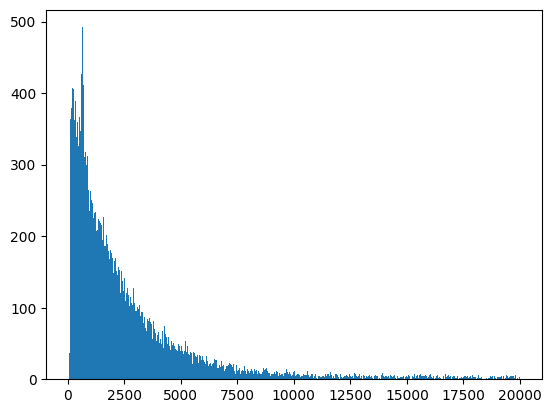

In [28]:
###################
# Set a bin count #
###################
# - Optimized Bins
bin_setting = 1000
#############################
# Initial Plot & Setup bins #
counts, bins, bars = plt.hist(DecayTime, bins=bin_setting)


###################
# Define Bin Center
bin_centers = np.array([
    (bins[i] + bins[i + 1])/2
    for i in range(len(bins) - 1)
])

In [29]:
##################
# Fit parameters #
tau = 2000
B = 1200
A = 20
guess = np.array([tau, B, A])
#############################
#
#################
i = 1          #
#################
#
#####################
# Call fit function ##################################################
popt, pcov = curve_fit(Fit_Func, bin_centers[i:], counts[i:], guess) #

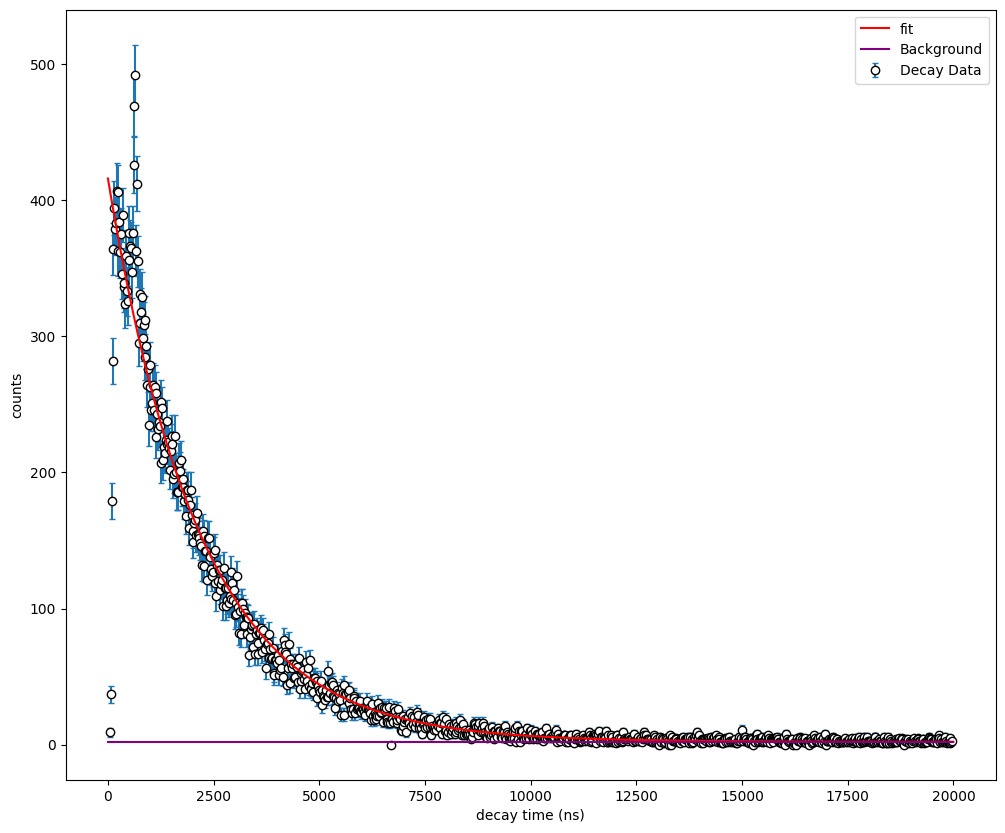

[2.18788998e+03 4.13758964e+02 2.16696082e+00]

------------------------------------------
| The Calculated Muon Lifetime is:
|    2187.890 +/- 31.653 nanoseconds 
|   
|      or 
|
|    2.188 +/- 0.032 microseconds
------------------------------------------
|  This is accurate by 
|  0.41602 %
|
------------------------------------------



In [31]:
plt.figure(figsize=(12, 10))
###################
# Plot Bin Height #
###################
# - plotting the bin height as a scatter allows
#    for the best-fit to function properly
plt.scatter(
    bin_centers, counts,
    color='red',
    s=5
)
##############
# Error Bars #################
errors = np.sqrt(counts)
#
plt.errorbar(
    bin_centers, counts,
    yerr=errors,
    fmt='o',  
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=1.0,
    linestyle='', 
    capsize=2, 
    zorder=1,
    label='Decay Data'
)
###############################
#
#################
# Create X-axis #
#################
# - This is a maximum of 
#    20000 nano-seconds
#    with 100 bins
x = np.linspace(0, 20000, bin_setting)
##############################
#
#####################
# Plot the Best-Fit #
plt.plot(
    x, Fit_Func(x, *popt),
    label='fit',
    color='red'
)
#######################
#
##############
# Histrogram ######
'''
plt.hist(DecayTime, bins=bin_setting, 
         color='blue')
'''
########################

###################
# Plot Background #
Background = np.full_like(x, popt[2])
plt.plot(x,Background,
        label='Background',
        color='Purple')
######################
#
#################
# Plot Settings #
plt.xlabel('decay time (ns)')
plt.ylabel('counts')
plt.legend()
plt.show()
#######################################################
#
###################################
# Output the optimized parameters #
print(popt) #######################
#############
#
#################################
# Extract Error from Covariance #
perr = np.sqrt(np.diag(pcov))
#################################
#
####################
# DecayTime Output #
####################
# Accepted Value
Muon_Decay_accepted_value = 2.19703
# Accuracy with respect to accepted value
Accuracy_percent = ((Muon_Decay_accepted_value - (popt[0]/1e3))/Muon_Decay_accepted_value)*100
# Final Output
Muon_Decay_Output = f"""
{'-'*42}
| The Calculated Muon Lifetime is:
|    {popt[0]:.3f} +/- {perr[0]:.3f} nanoseconds 
|   
|      or 
|
|    {popt[0]/1e3:.3f} +/- {perr[0]/1e3:.3f} microseconds
{'-'*42}
|  This is accurate by 
|  {Accuracy_percent:.5f} %
|
{'-'*42}
"""
print(Muon_Decay_Output)


</br>

# Conclusion

The accepted value for muon lifetime is $2.19703 \pm 0.00004 \mu sec$, and from our experiment we see a value of  $2.184\pm 0.032 \mu sec$. We can conclude that our value was within roughly $- 0.57285$ % of the accpeted value, and we have succefully calculated the average lifetime of muon decay.   